In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import naive_bayes
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import ComplementNB
from bokeh.io import output_file, show, export_png
from bokeh.models import ColumnDataSource
from bokeh.models.widgets import DataTable, DateFormatter, TableColumn
import json
import pickle

In [ ]:
def read_data(path):
    df = pd.read_csv(path)
    return df

In [ ]:
def drop_duplicates(df):
    df.drop_duplicates(subset = "track_name", inplace = True)
    df.drop_duplicates(subset = "track_id", inplace = True)
    df.drop(['genre'],axis = 1 , inplace = True)
    ind=df[df["popularity"]==0].index
    df.drop(ind,axis=0, inplace = True)

    return df

In [ ]:
def one_hot_encode(df1):
    categorical = ['key','mode','time_signature']
    numerical = ['acousticness','danceability','duration_ms','energy','liveness','instrumentalness','loudness','speechiness','tempo','valence']
    df4 = df1.copy()
    for c in categorical:
        df = df1[[c]]
        c_dum = pd.get_dummies(df,prefix = [c])
        df4 = pd.concat([df4,c_dum], axis=1)

    df4 = df4.drop(categorical,axis=1)

    return df4

In [ ]:
def find_dfnum(df1):
    df_num = df1.copy()
    categorical2 = ['popularity','artist_name','key','mode','time_signature','track_name','track_id']
    for c in categorical2:
        df_num = df_num.drop(c,axis=1)
    return df_num

In [ ]:
def scale(df_num):
    x = df_num.to_numpy()
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    df_num = pd.DataFrame(x_scaled)
    numerical = {0:'acousticness',1 : 'danceability', 2 : 'duration_ms',3 : 'energy', 5 :'liveness', 4 :'instrumentalness', 6 :'loudness', 7 :'speechiness', 8 :'tempo', 9 :'valence'}
    df_num.rename(columns=numerical, inplace=True)

    return df_num


In [ ]:
def def_targ_feat(df3):
    target = df3.popularity
    features = df3.drop(['popularity'],axis = 1)
    return target, features

In [ ]:
def targ_to_binary(target):
    target_binary = target.copy()
    for i in range(len(target)):
        if target.iloc[i]>=40:
            target_binary.iloc[i]=1
        else:
            target_binary.iloc[i]=0
    return target_binary


In [ ]:
def targ_to_multi(target):
    target_multi = target.copy()
    for i in range(len(target)):
        if target.iloc[i]<=20 and target.iloc[i]>0:
            target_multi.iloc[i]=1
        elif target.iloc[i]<=40 and target.iloc[i]>20:
            target_multi.iloc[i]=2
        elif target.iloc[i]<=60 and target.iloc[i]>40:
            target_multi.iloc[i]=3
        elif target.iloc[i]<=80 and target.iloc[i]>60:
            target_multi.iloc[i]=4
        elif target.iloc[i]<=100 and target.iloc[i]>80:
            target_multi.iloc[i]=5
    return target_multi

In [ ]:
def concat_num_cat(features,df_num):
    numerical = ['acousticness','danceability','duration_ms','energy','liveness','instrumentalness','loudness','speechiness','tempo','valence']
    features = features.drop(numerical, axis=1)
    features = features.reset_index()
    features = pd.concat([features,df_num], axis=1)
    features = features.drop(['index'], axis = 1)
    features = features.set_index('track_name')
    features = features.drop(['artist_name','track_id'], axis = 1 )
    return features

In [ ]:
def droplvnt(df):
    df = df.drop(['analysis_url','id','track_href','type','uri'], axis = 1 )
    return df

In [ ]:
def preparationformodel(filename):
    df = pd.read_csv(filename)
    df1 = drop_duplicates(df)
    df3 = one_hot_encode(df1)
    df_num = find_dfnum(df1)
    df_num = scale(df_num)
    target, features = def_targ_feat(df3)
    target_binary = targ_to_binary(target)
    targey_multiple = targ_to_multi(target)
    features = concat_num_cat(features,df_num)
    return features,target,target_binary,targey_multiple



In [ ]:
features,target,target_binary,targey_multiple = preparationformodel("SpotifyFeatures.csv")

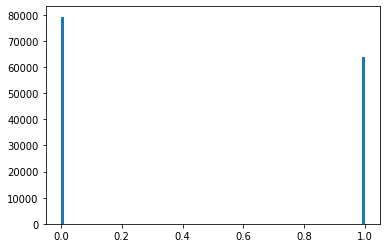

In [ ]:
plt.hist(target_binary, bins = 100)
plt.show()

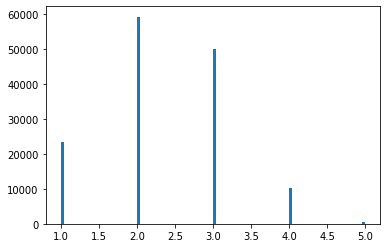

In [ ]:
plt.hist(targey_multiple, bins = 100)
plt.show()

# ML Model

In [ ]:
def train_test(features,target):
    X_train, X_test, y_train, y_test = train_test_split(features,target,test_size=0.1, random_state = 30)
    return X_train, X_test, y_train, y_test

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix

In [ ]:
X_train, X_test, y_train, y_test = train_test(features,target_binary)

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test(features, targey_multiple)

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test(features,target)

# Naive Bayes

In [ ]:
def naive_bayes(X_train,X_test,y_train,y_test):
    clf = ComplementNB()
    clffit = clf.fit(X_train,y_train)
    clf_score = clf.score(X_test,y_test)
    y_proba = clf.predict_proba(X_test)
    y_pred = clf.predict(X_test)
    y_true = y_test
    conf_mat = sklearn.metrics.confusion_matrix(y_true,y_pred, normalize = 'true')
    conf_mat_multi = multilabel_confusion_matrix(y_true, y_pred)
    return clffit, clf_score, conf_mat, conf_mat_multi

In [ ]:
clffit1_nb, clf_score1_nb, conf_mat1_nb, conf_mat_multi1_nb = naive_bayes(X_train,X_test,y_train,y_test)

In [ ]:
clffit2_nb, clf_score2_nb, conf_mat2_nb, conf_mat_multi2_nb = naive_bayes(X_train1,X_test1,y_train1,y_test1)

In [ ]:
clffit3_nb, clf_score3_nb, conf_mat3_nb, conf_mat_multi3_nb = naive_bayes(X_train2,X_test2,y_train2,y_test2)

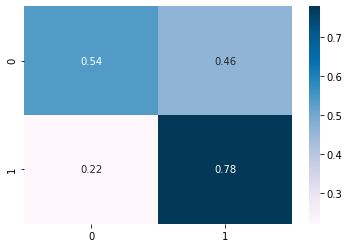

In [ ]:
sns.heatmap(conf_mat1_nb, annot=True, cmap= 'PuBu')

In [ ]:
clffit2_nb, clf_score2_nb, conf_mat2_nb, conf_mat_multi2_nb = naive_bayes(X_train1,X_test1,y_train1,y_test1)

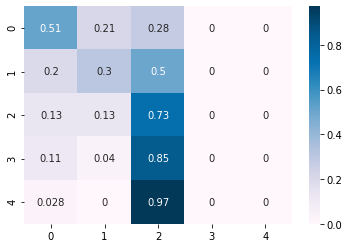

In [ ]:
sns.heatmap(conf_mat2_nb, annot=True, cmap= 'PuBu')

# Decision Tree

In [ ]:
def decision_tree(X_train,X_test,y_train,y_test):
    clf = tree.DecisionTreeClassifier()
    clffit = clf.fit(X_train,y_train)
    clf_score = clf.score(X_test,y_test)
    y_proba = clf.predict_proba(X_test)
    y_pred = clf.predict(X_test)
    y_true = y_test
    conf_mat = sklearn.metrics.confusion_matrix(y_true,y_pred, normalize = 'true')
    conf_mat_multi = multilabel_confusion_matrix(y_true, y_pred)
    return clffit, clf_score, conf_mat, conf_mat_multi

In [ ]:
clffit1_dt, clf_score1_dt, conf_mat1_dt, conf_mat_multi1_dt = decision_tree(X_train,X_test,y_train,y_test)

In [ ]:
clffit2_dt, clf_score2_dt, conf_mat2_dt, conf_mat_multi2_dt = decision_tree(X_train1,X_test1,y_train1,y_test1)

In [ ]:
clffit3_dt, clf_score3_dt, conf_mat3_dt, conf_mat_multi3_dt = decision_tree(X_train2,X_test2,y_train2,y_test2)

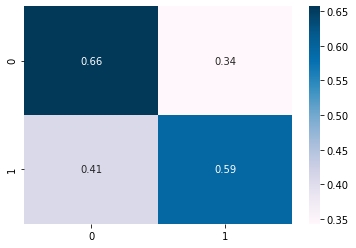

In [ ]:
sns.heatmap(conf_mat1_dt, annot=True, cmap= 'PuBu')

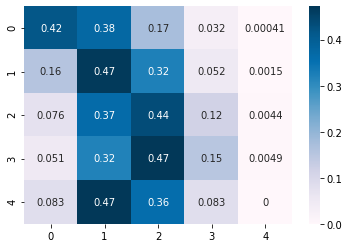

In [ ]:
sns.heatmap(conf_mat2_dt, annot=True, cmap= 'PuBu')

# Random Forest

In [ ]:
def random_forest(X_train,X_test,y_train,y_test):
    clf = RandomForestClassifier(n_estimators=1000)
    clffit = clf.fit(X_train,y_train)
    clf_score = clf.score(X_test,y_test)
    y_proba = clf.predict_proba(X_test)
    y_pred = clf.predict(X_test)
    y_true = y_test
    conf_mat = sklearn.metrics.confusion_matrix(y_true,y_pred, normalize = 'true')
    conf_mat_multi = multilabel_confusion_matrix(y_true, y_pred)

    return clffit, clf_score, conf_mat, conf_mat_multi

In [ ]:
#clffit1_rf, clf_score1_rf, conf_mat1_rf, conf_mat_multi1_rf = random_forest(X_train,X_test,y_train,y_test)

In [ ]:
#filename = 'finalized_model.sav'
#pickle.dump(clffit1_rf, open(filename, 'wb'))

### Pickled 1

## Run This

In [ ]:
clffit1_rf = pickle.load(open('finalized_model.sav', 'rb'))

In [ ]:
clf_score1_rf = clffit1_rf.score(X_test,y_test)

## ----------------

In [ ]:
#clffit2_rf, clf_score2_rf, conf_mat2_rf, conf_mat_multi2_rf = random_forest(X_train1,X_test1,y_train1,y_test1)

In [ ]:
#filename = 'finalized_model2_rf.sav'
#pickle.dump(clffit2_rf, open(filename, 'wb'))

### Pickled 2

## Run This

In [ ]:
clffit2_rf = pickle.load(open('finalized_model2_rf.sav', 'rb'))

In [ ]:
clf_score2_rf = clffit2_rf.score(X_test, y_test)

## ----------------

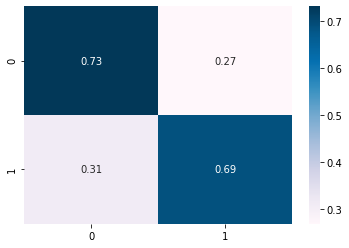

In [ ]:
sns.heatmap(conf_mat1_rf, annot=True, cmap= 'PuBu')

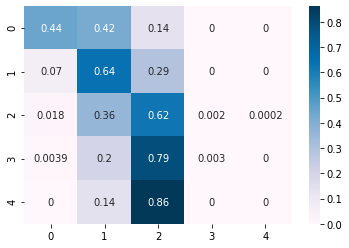

In [ ]:
sns.heatmap(conf_mat2_rf, annot=True, cmap= 'PuBu')

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
def logistic_regression(X_train,X_test,y_train,y_test):
    clf = clf = LogisticRegression(random_state=0, max_iter=999999)
    clffit = clf.fit(X_train,y_train)
    clf_score = clf.score(X_test,y_test)
    y_proba = clf.predict_proba(X_test)
    y_pred = clf.predict(X_test)
    y_true = y_test
    conf_mat = sklearn.metrics.confusion_matrix(y_true,y_pred, normalize = 'true')
    conf_mat_multi = multilabel_confusion_matrix(y_true, y_pred)

    return clffit, clf_score, conf_mat, conf_mat_multi

In [ ]:
clffit1_lr, clf_score1_lr, conf_mat1_lr, conf_mat_multi1_lr = logistic_regression(X_train, X_test, y_train, y_test)

In [ ]:
clffit2_lr, clf_score2_lr, conf_mat2_lr, conf_mat_multi2_lr = logistic_regression(X_train1, X_test1, y_train1, y_test1)

In [ ]:
clffit3_lr, clf_score3_lr, conf_mat3_lr, conf_mat_multi3_lr = logistic_regression(X_train2, X_test2, y_train2, y_test2)

In [ ]:
filename = 'finalized_model3_lr.sav'
pickle.dump(clffit3_lr, open(filename, 'wb'))

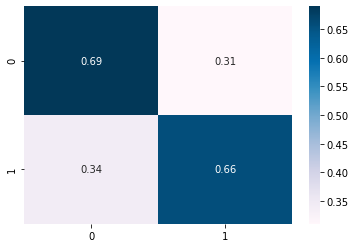

In [ ]:
sns.heatmap(conf_mat1_lr, annot=True, cmap= 'PuBu')

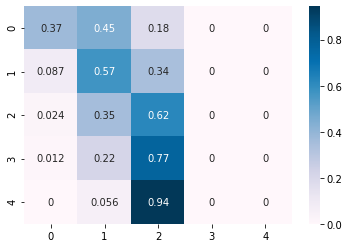

In [ ]:
sns.heatmap(conf_mat2_lr, annot=True, cmap= 'PuBu')

# Model Investigation

In [ ]:
data = dict(
        models=['Naive Bayes 0-100', 'Naive Bayes 1-0','Naive Bayes 1-5', 'Decision Tree 0-100','Decision Tree 1-0', 'Decision Tree 1-5',
                'Random Forest 1-0', 'Random Fores 1-5', 'Logistic Regression 0-100' ,'Logistic Regression 1-0', 'Logistic Regression 1-5'],
        scores=['{:6.2f}%'.format(100*clf_score3_nb),
                '{:6.2f}%'.format(100*clf_score1_nb),
                '{:6.2f}%'.format(100*clf_score2_nb),
                '{:6.2f}%'.format(100*clf_score3_dt),
                '{:6.2f}%'.format(100*clf_score1_dt),
                '{:6.2f}%'.format(100*clf_score2_dt),
                '{:6.2f}%'.format(100*clf_score1_rf),
                '{:6.2f}%'.format(100*clf_score2_rf),
                '{:6.2f}%'.format(100*clf_score3_lr),
                '{:6.2f}%'.format(100*clf_score1_lr),
                '{:6.2f}%'.format(100*clf_score2_lr)]
    )
source = ColumnDataSource(data)

columns = [
        TableColumn(field="models", title="Models"),
        TableColumn(field="scores", title="Scores"),
    ]
data_table = DataTable(source=source, columns=columns, width=400, height=320)

show(data_table)

# Density Plot with Multiple Genres

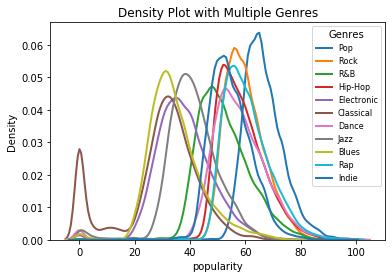

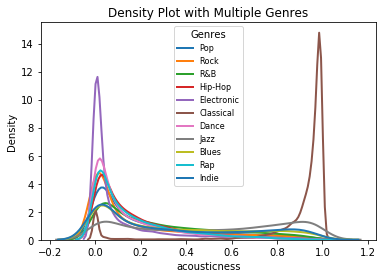

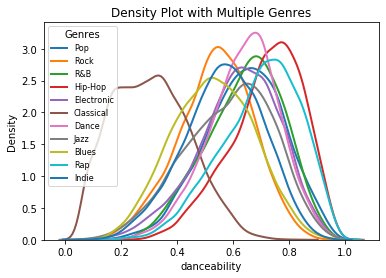

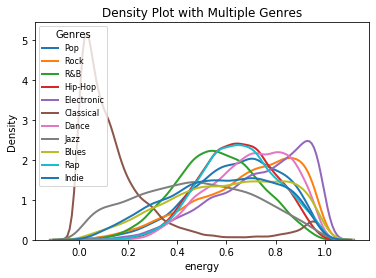

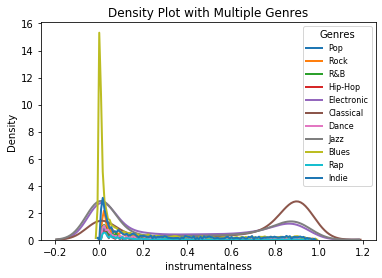

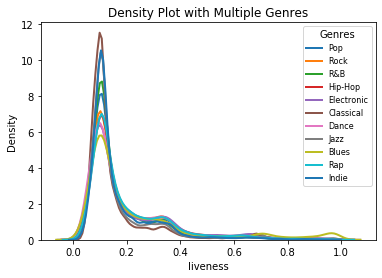

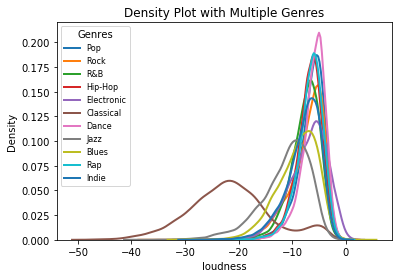

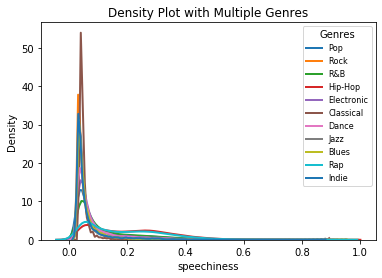

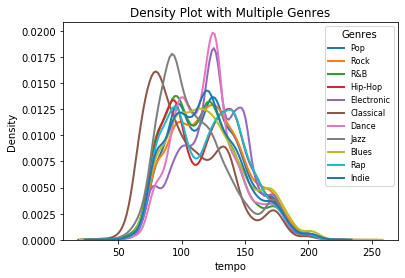

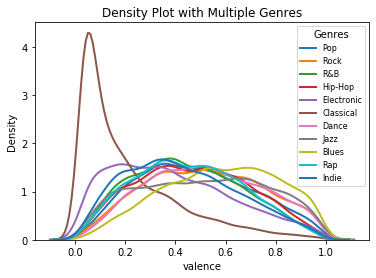

<Figure size 432x288 with 0 Axes>

In [ ]:
genres = ['Pop', 'Rock','R&B','Hip-Hop','Electronic','Classical','Dance','Jazz','Blues','Rap','Indie']
features = ['popularity','acousticness', 'danceability','energy','instrumentalness','liveness','loudness','speechiness','tempo','valence']

for feat in features:
    for genre in genres:
        subset = df[df['genre'] == genre]
        sns.distplot(subset[feat], hist = False, kde = True, kde_kws = {'linewidth': 2},label = genre)

    plt.legend(prop={'size': 8}, title = 'Genres')
    plt.title('Density Plot with Multiple Genres')
    plt.xlabel(feat)
    plt.ylabel('Density')
    plt.figure()

# User Input Popularity Prediction

In [ ]:
def json_import():
    with open('data.json', 'r') as f:
        data = json.load(f)
    df_json = pd.DataFrame(data)
    return df_json

In [ ]:
def prediction(features,df_json,i):
    i_d=df_json.iloc[i]["id"]
    df=read_data("SpotifyFeatures.csv")
    df_num=find_dfnum(df)
    df_num=df_num.drop("genre",axis=1)
    maxx = df_num.max()
    maxx = np.array(maxx.tolist())
    minn = df_num.min()
    minn = np.array(minn.tolist())
    df_num.iloc[0],minn,maxx
    df_json = droplvnt(df_json)
    acousticness=df_json.T[i][0]
    danceability=df_json.T[i][1]
    duration_ms=df_json.T[i][2]
    energy=df_json.T[i][3]
    instrumentalness=df_json.T[i][4]
    key=df_json.T[i][5]
    liveness=df_json.T[i][6]
    loudness=df_json.T[i][7]
    mode=df_json.T[i][8]
    speechiness=df_json.T[i][9]
    tempo=df_json.T[i][10]
    time_signature=df_json.T[i][11]
    valence=df_json.T[i][12]
    acousticness=(acousticness-minn[0])/(maxx[0]-minn[0])
    danceability=(danceability-minn[1])/(maxx[1]-minn[1])
    duration_ms=(duration_ms-minn[2])/(maxx[2]-minn[2])
    energy=(energy-minn[3])/(maxx[3]-minn[3])
    instrumentalness=(instrumentalness-minn[4])/(maxx[4]-minn[4])
    liveness=(liveness-minn[5])/(maxx[5]-minn[5])
    loudness=(loudness-minn[6])/(maxx[6]-minn[6])
    speechiness=(speechiness-minn[7])/(maxx[7]-minn[7])
    tempo=(tempo-minn[8])/(maxx[8]-minn[8])
    valence=(valence-minn[9])/(maxx[9]-minn[9])

    x = pd.DataFrame(features.iloc[0]).T
    x = pd.DataFrame(columns=x.columns)
    x = x.T
    A, Am,B, C, Cm, D, Dm=0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0
    E, F,Fm,G, Gm, modeMajor=0.0, 0.0, 0.0, 0.0, 0.0, 0.0
    modeMinor, time_0, time_1=0.0, 0.0, 0.0
    time_3, time_4, time_5=0.0, 0.0, 0.0

    if key==0:
        C=1.0
    elif key==1:
        Cm=1.0
    elif key==2:
        D=1.0
    elif key==3:
        Dm=1.0
    elif key==4:
        E=1.0
    elif key==5:
        F=1.0
    elif key==6:
        Fm=1.0
    elif key==7:
        G=1.0
    elif key==8:
        Gm=1.0
    elif key==9:
        A=1.0
    elif key==10:
        Am=1.0
    elif key==11:
        B=1.0
    if mode==1:
        modeMajor=1.0
    elif mode==0:
        modeMinor=1.0
    if time_signature==0:
        time_0=1.0
    elif time_signature==1:
        time_1=1.0
    elif time_signature==2:
        time_2=1.0
    elif time_signature==3:
        time_3=1.0
    elif time_signature==4:
        time_4=1.0


    x[0]=[A, Am,B, C, Cm, D, Dm,
       E, F,Fm,G, Gm, modeMajor,
       modeMinor, time_0, time_1,
       time_3, time_4, time_5,
       acousticness, danceability,duration_ms, energy,
       instrumentalness,liveness, loudness, speechiness, tempo,
       valence]
    return x.T,i_d

In [ ]:
def predicter(features):
    df_json = json_import()
    mmm,i_d = prediction(features,df_json,0)
    print("ID of your song: " + i_d)
    print()
    print("----------------")
    print()
    print ("Naive Bayes Prediction 0-1" , clffit1_nb.predict(mmm))
    print ("Decision Tree Prediction 0-1" , clffit1_dt.predict(mmm))
    print ("Random Forest Prediction 0-1" , clffit1_rf.predict(mmm))
    print ("Logistic Regression Prediction 0-1" , clffit1_lr.predict(mmm))
    print()
    print("----------------")
    print()
    print ("Naive Bayes Prediction 1-5" , clffit2_nb.predict(mmm))
    print ("Decision Tree Prediction 1-5" , clffit2_dt.predict(mmm))
    print ("Random Forest Prediction 1-5" , clffit2_rf.predict(mmm))
    print ("Logistic Regression Prediction 1-5" , clffit2_lr.predict(mmm))
    print()
    print("----------------")
    print()
    print ("Naive Bayes Prediction 0-100" , clffit3_nb.predict(mmm))
    print ("Decision Tree Prediction 0-100" , clffit3_dt.predict(mmm))
    print ("Logistic Regression Prediction 0-100" , clffit3_lr.predict(mmm))
    print ("Check your results : https://developer.spotify.com/documentation/web-api/reference/tracks/get-track/")



In [ ]:
predicter(features)

ID of your song: 1fZF2M4F0azWhEZkzDOwm6

----------------

Naive Bayes Prediction 0-1 [0]
Decision Tree Prediction 0-1 [0]
Random Forest Prediction 0-1 [0]
Logistic Regression Prediction 0-1 [0]

----------------

Naive Bayes Prediction 1-5 [1]
Decision Tree Prediction 1-5 [3]
Random Forest Prediction 1-5 [2]
Logistic Regression Prediction 1-5 [2]

----------------

Naive Bayes Prediction 0-100 [10]
Decision Tree Prediction 0-100 [50]
Logistic Regression Prediction 0-100 [27]
Check your results : https://developer.spotify.com/documentation/web-api/reference/tracks/get-track/
